**Inportando dados**

In [25]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.abspath(os.path.join(os.pardir))
DATA_FOLDER = os.path.join(PROJECT_ROOT, 'data', 'raw')
sys.path.append(os.path.join(PROJECT_ROOT, 'src'))

from utils.dates import Dates

**Tabela Projetos**

In [26]:
projetos_csv = os.path.join(DATA_FOLDER, 'projetos.csv')

cols = ['IdPRONAC', 'DtProtocolo', 'DtFimExecucao']

dt_projetos = pd.read_csv(projetos_csv, usecols = cols, low_memory = False)

dt_projetos.head()

,IdPRONAC,DtProtocolo,DtFimExecucao
0,1,2008-09-12 00:00:00,2010-12-31 00:00:00
1,2,2008-09-12 00:00:00,NaN
2,3,2008-09-12 00:00:00,NaN
3,4,2008-09-03 00:00:00,NaN
4,5,2008-09-12 00:00:00,NaN


**Separar projetos criados e projetos finalizados por ano**

In [50]:
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

created_projects = []
finished_projects = []

for year in years:
    created_projects_filter = dt_projetos['DtProtocolo'] < '{}-12-31'.format(year)
    finished_projects_filter = dt_projetos['DtFimExecucao'] < '{}-12-31'.format(year)
    
    created_projects.append(len(dt_projetos[created_projects_filter]))
    finished_projects.append(len(dt_projetos[finished_projects_filter]))

**Gráfico de projetos criados vs finalizados no decorrer do tempo**

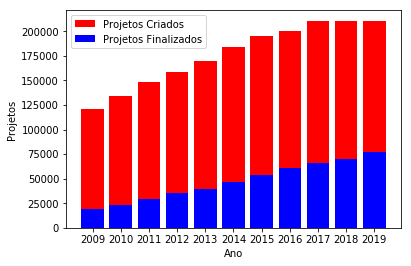

In [44]:
ax = plt.subplot(111)

ax.set_xlabel('Ano')
ax.set_ylabel('Projetos')

created_projects_bar = ax.bar(years, created_projects, color = 'red', align = 'center')
finished_projects_bar = ax.bar(years, finished_projects, color = 'blue', align = 'center')

ax.legend( (created_projects_bar, finished_projects_bar), ('Projetos Criados', 'Projetos Finalizados') )

plt.show()